# Convolution

**Name**: ZHU GUANGYU  
**Student ID**: 20165953  
**Github Repo**: [assignment05](https://github.com/z1ggy-o/cv_assignment/tree/master/assignment05)  

---

Convolution is an important operations in image processing, and usually 
is used for blurring, sharpening, embossing, edge detection.

An image actually is an array of pixel values. If we regart it as a continuous function of spatial coodinates, this function is the brightness of light impinging onto the camera sensor. Partial derivatives of this continuous function can be used to measure the edges of objects in the image.

## Edges

Since an edge is an abrupt change of image intensity, we change find the abrupt by computing the derivatives of an image.

Let's use *x* to represent horizontal, *y* to represent vertical. The *partial derivative* of function $f(x,y)$ is

$$ \frac{\partial{f(x,y)}}{\partial x} = \lim_{\Delta y\rightarrow 0} \frac{f(x,y + \Delta x)-f(x,y)}{\Delta x}$$

$$ \frac{\partial{f(x,y)}}{\partial y} = \lim_{\Delta y\rightarrow 0} \frac{f(x,y + \Delta y)-f(x,y)}{\Delta y}$$

As we said before, we regart the image matrix as a continuous function, then each element of the matrix is the value of $f(x,y)$ and $\Delta x$  ($\Delta y$) is 1.

This means the partial derivatives of the function is the substracion between two neighbor pixels. In this situation, *convolution* can help us to get the partial derivative matrix.

---


## Implementation

Let's say we get a matrix like this:$\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots & x_{2n} \\
    \vdots & \vdots & \vdots & \vdots &\vdots  \\
    x_{d1} & x_{d2} & x_{d3} & \dots & x_{dn}
\end{bmatrix}$

The partial deravitive of $ith$ row is $x_{i (j+1)} - x_{i j}$.
To get this result we need define our convolution kernel to$\begin{bmatrix}
    1 & -1
\end{bmatrix}$

The partial deravitive of $jth$ column is $x_{(i+1) j} - x_{i j}$,
thus we define our convolution kernel to $\begin{bmatrix}
    1\\
    -1
\end{bmatrix}$

However, the problem is if we use the $1 \times 2$ or $2 \times 1$ filters to do the computation, they will shift the image by half a pixel. To avoid this, we need to use kernels that have odd number of elements since the symmetric property.

We change the kernel to:
$\begin{bmatrix}
    1 & 0 & -1 
\end{bmatrix}$
and,
$\begin{bmatrix}
    1 \\
    0 \\
    -1
\end{bmatrix}$

---

Let's start coding.  
First import packages that we need.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage import io, color
from skimage import exposure

Read the image file and get the gray image.

In [2]:
file_image = 'cau.jpg'

im_color = io.imread(file_image)
im_gray = color.rgb2gray(im_color)

Plot out the input image.

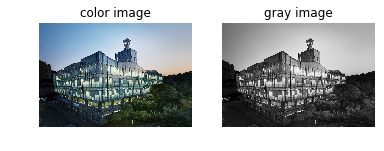

In [3]:
p1 = plt.subplot(1, 2, 1)
p1.set_title('color image')
plt.imshow(im_color)
plt.axis('off')

p2 = plt.subplot(1, 2, 2)
p2.set_title('gray image')
plt.imshow(im_gray, cmap='gray')
plt.axis('off')

plt.show()

Since the image data is represented by a 2 dimentional matrix, we need
to extend our derivative which we defined before into 2 dimentinal.

Then, we get the convolution kernel for x-direction derivative:
$\begin{bmatrix}
    1 & 0 & -1 \\
    1 & 0 & -1 \\
    1 & 0 & -1
\end{bmatrix}$
and convolution kernel for y-direction derivative:
$\begin{bmatrix}
    1 & 1 & 1 \\
    0 & 0 & 0 \\
    -1 & -1 & -1
\end{bmatrix}$

In [4]:
# x-axis kernel
ker_x = np.array([
                     [1, 0, -1],
                     [1, 0, -1],
                     [1, 0, -1]])

# y-axis kernel
ker_y = np.array([[1, 1, 1],
                  [0, 0, 0],
                  [-1, -1, -1]])

Use these two kernels to do convolution with the `gray image`, we can get the derivative.

Here we use `scipy.signal.convolve2d` function directly. 

Because at the boundary there are some mapping part to kernel are empty, we need some paddings to handle the problem. `boundary` keyword indicates the way how we handle the problem.

The `mode` keyword indicates the size of the output. Here we choose get the same size as the inputs.

In [7]:
# derivative x-axis
de_x = signal.convolve2d(
    im_gray, ker_x, boundary='symm', mode='same')

# derivative y-axis
de_y = signal.convolve2d(
    im_gray, ker_y, boundary='symm', mode='same')

Plot the result:

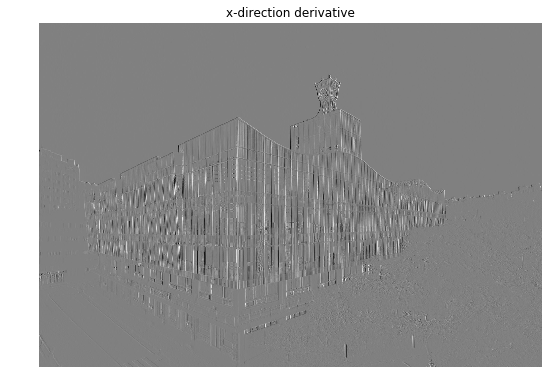

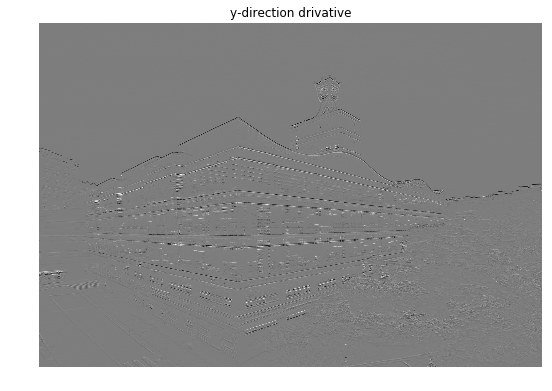

In [8]:
plt.figure(2, figsize=(9,12))
plt.title('x-direction derivative')
plt.imshow(de_x, cmap='gray')
plt.axis('off')

plt.figure(3, figsize=(9,12))
plt.title('y-direction drivative')
plt.imshow(de_y, cmap='gray')
plt.axis('off')

plt.show()

The result of derivative is mixed by positive and negative values.
Convert them to absolute value, then plot again to see the result.

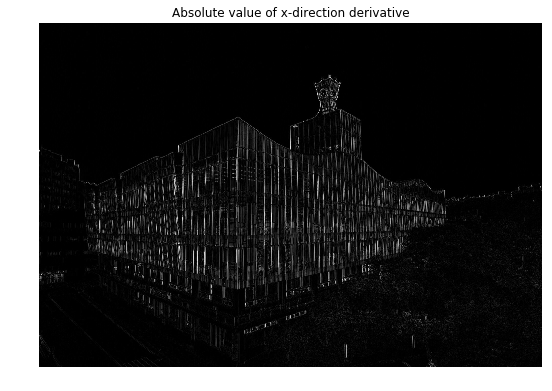

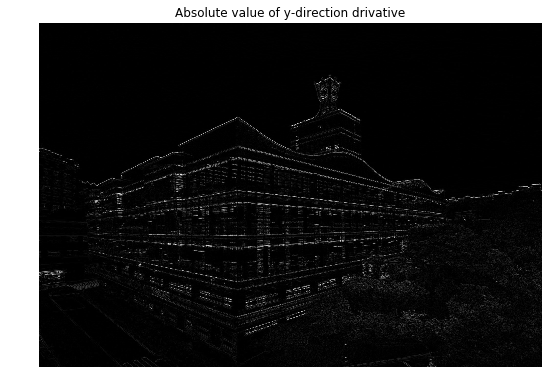

In [9]:
# absolute value of gradient
def deriv_abs(deriv):
    n_row = len(deriv)
    n_col = len(deriv[0])
    result = np.empty([n_row, n_col])

    for i in range(n_row):
        for j in range(n_col):
            result[i][j] = abs(deriv[i][j])
    
    return result

abs_x = deriv_abs(de_x)
abs_y = deriv_abs(de_y)

plt.figure(4, figsize=(9,12))
plt.title('Absolute value of x-direction derivative')
plt.imshow(abs_x, cmap='gray')
plt.axis('off')

plt.figure(5, figsize=(9,12))
plt.title('Absolute value of y-direction drivative')
plt.imshow(abs_y, cmap='gray')
plt.axis('off')

plt.show()


From the graphs above we can find the x-direction derivative shows the x-direction's edges and y-direction derivative shows the edges of y-direction.

---

Since we have got x and y direction's derivative, we get each point's gradient$\begin{bmatrix}
 \frac{\partial{f(x,y)}}{\partial x} \\
 \frac{\partial{f(x,y)}}{\partial y}
\end{bmatrix}$

The gradient of image shows the changes between each two pixels.

Let's see the magnitude of gradient first:

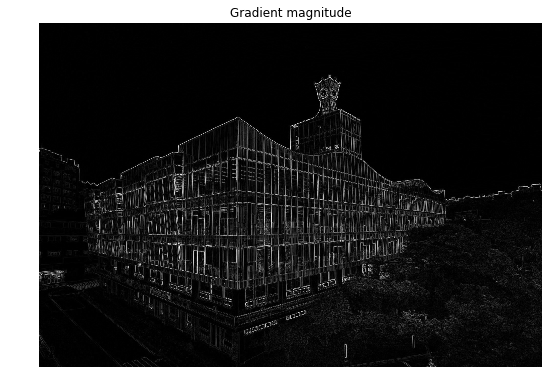

In [10]:
# function for computing magnitude of the gradient
def magnitude(de_x, de_y):
    n_row = len(de_x)
    n_col = len(de_x[0])
    mag = np.empty([n_row, n_col])

    for i in range(n_row):
        for j in range(n_col):
            gradient = np.array([de_x[i][j], de_y[i][j]])
            dist = np.linalg.norm(gradient)
            mag[i][j] = dist

    return mag

magnitude = magnitude(de_x, de_y)

plt.figure(6, figsize=(9,12))
plt.title('Gradient magnitude')
plt.imshow(magnitude, cmap='gray')
plt.axis('off')

plt.show()

Now, try the direction of gradient. To get the angle we need formula
$$\tan^{-1}\frac{y}{x}$$

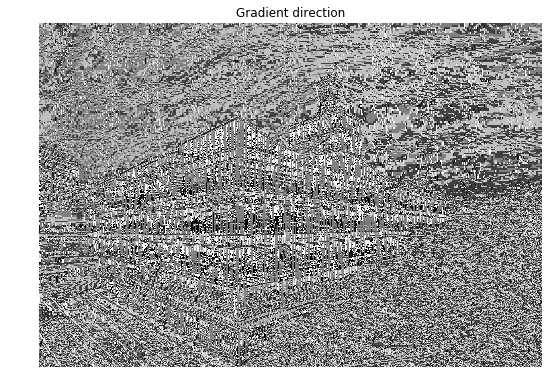

In [11]:
# function for computing the direction of the gradient
def direction(de_x, de_y):
    n_row = len(de_x)
    n_col = len(de_x[0])
    direct = np.empty([n_row, n_col])

    for i in range(n_row):
        for j in range(n_col):
            gradient = np.array([de_x[i][j], de_y[i][j]])
            radius = np.arctan2(gradient[1], gradient[0])
            direct[i][j] = radius

    return direct

direction = direction(de_x, de_y)

plt.figure(7, figsize=(9,12))
plt.title('Gradient direction')
plt.imshow(direction, cmap='gray')
plt.axis('off')

plt.show()

If we change `cmap` to `hsv` we can observe angles better because hsv is cyclic:

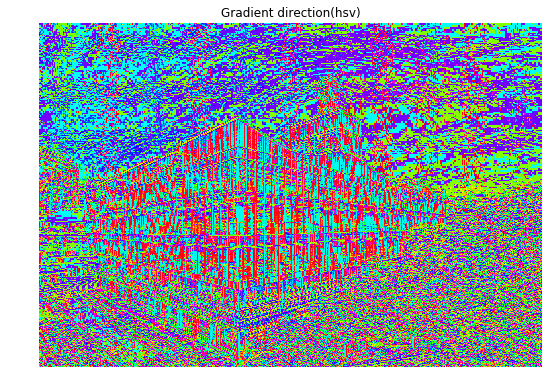

In [12]:
plt.figure(8, figsize=(9,12))
plt.title('Gradient direction(hsv)')
plt.imshow(direction, cmap='hsv')
plt.axis('off')

plt.show()

---

### Other kernels

There are many other kernels for image processing,
here we try two kernels for *smoothing* and *sharpen*.

#### Smoothing

There are many kernels for smoothing image, we choose the simplest one:
$$ \frac{1}{9}
\begin{bmatrix}
    1 & 1 & 1 \\
    1 & 1 & 1 \\
    1 & 1 & 1
\end{bmatrix}$$

Need to notice, the sum of the kernel is one because we do not want to change the value of the image.

In [13]:
# define smooth kernel
kernel_smooth = np.array([
                          [1, 1, 1],
                          [1, 1, 1],
                          [1, 1, 1]
                         ]) / 9


It makes each pixel to its neighbers' average value so the contrast between pixels is reduced.

Check the result:

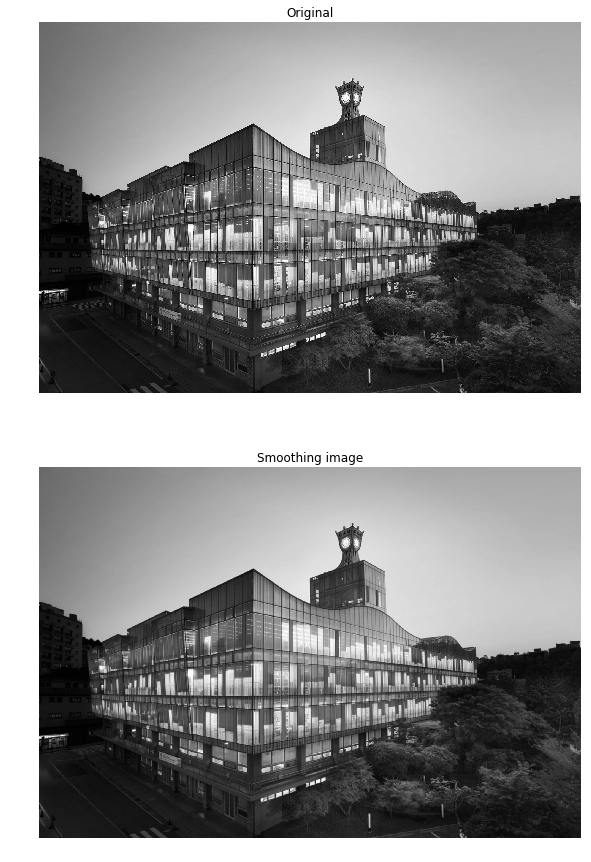

In [14]:
smooth_img = signal.convolve2d(
    im_gray, kernel_smooth, boundary='symm', mode='same')

fig, (ax_orig, ax_smooth) = plt.subplots(2, 1, figsize=(15, 15))
ax_orig.imshow(im_gray, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()


ax_smooth.imshow(smooth_img, cmap='gray')
ax_smooth.set_title('Smoothing image')
ax_smooth.set_axis_off()

plt.show()

From images above we can find the image is smoothed, especially around the edges.

---

#### Sharpen kernel

Now let's try the *sharpen* kernel:
$$
\begin{bmatrix}
    0 & -1 & 0 \\
    -1 & 5 & -1 \\
    0 & -1 & 0
\end{bmatrix}
$$

In [15]:
# define sharpen kernel
kernel_sharpen = np.array([
                           [0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]
                          ])

This kernel increate the contrast between pixel and its neighbers.
If the pixel is on the edge, the contrast will become much bigger.

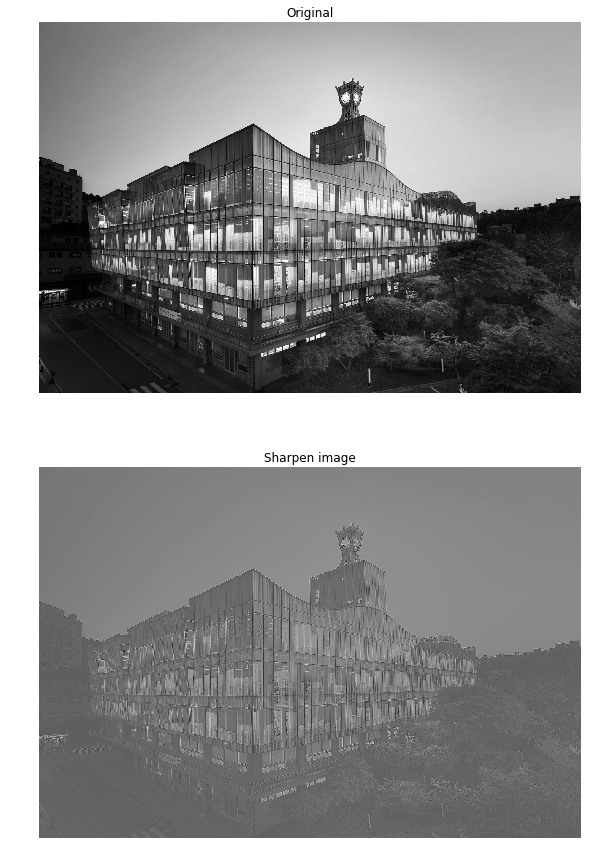

In [16]:
sharpen_img = signal.convolve2d(
    im_gray, kernel_sharpen, boundary='symm', mode='same')

fig, (ax_orig, ax_sharpen) = plt.subplots(2, 1, figsize=(15, 15))
ax_orig.imshow(im_gray, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()


ax_sharpen.imshow(sharpen_img, cmap='gray')
ax_sharpen.set_title('Sharpen image')
ax_sharpen.set_axis_off()

plt.show()

Because after computer some value pexils may be negative, and the postive value may bigger than 255.

Let's do some modification let value small than 0 be 0, bigger than 255 be 255.

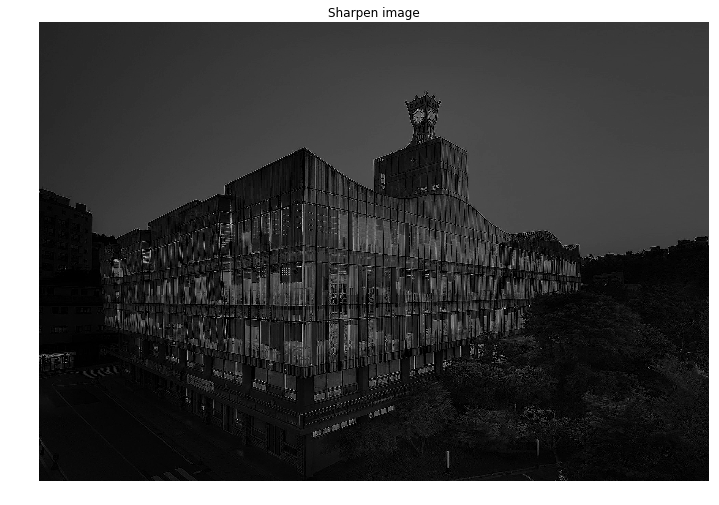

In [17]:
for i in range(len(sharpen_img)):
    for j in range(len(sharpen_img[0])):
        if sharpen_img[i][j] < 0:
            sharpen_img[i][j] = 0
        if sharpen_img[i][j] > 255:
            sharpen_img[i][j] = 255
            
plt.figure(figsize=(12,12))
plt.title('Sharpen image')
plt.imshow(sharpen_img, cmap='gray')
plt.axis('off')

plt.show()